In [1]:
# Import the Features and Targets
import pandas as pd
import numpy as np
import seaborn as sns

X_train = pd.read_csv("dataset/preprocessed/Features_Training_Set.csv", index_col=0).to_numpy()
X_test = pd.read_csv("dataset/preprocessed/Features_Testing_Set.csv", index_col=0).to_numpy()
y_train = pd.read_csv("dataset/preprocessed/Target_Training_Set.csv", index_col=0).to_numpy().ravel()
y_test = pd.read_csv("dataset/preprocessed/Target_Testing_Set.csv", index_col=0).to_numpy().ravel()

In [2]:
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=500, activation="relu", input_shape=(24,)))
model.add(tf.keras.layers.Dense(units=500, activation="relu"))
model.add(tf.keras.layers.Dense(units=500, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               12500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 514,001
Trainable params: 514,001
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(
  optimizer="Adam",
  loss="binary_crossentropy",
  metrics=['accuracy']
)

In [5]:
epoch_hists = model.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
40/40 [==============================] - 1s 7ms/step - loss: 0.5668 - accuracy: 0.6968
Epoch 2/100
40/40 [==============================] - 0s 6ms/step - loss: 0.4348 - accuracy: 0.8022
Epoch 3/100
40/40 [==============================] - 0s 6ms/step - loss: 0.3760 - accuracy: 0.8392
Epoch 4/100
40/40 [==============================] - 0s 7ms/step - loss: 0.3121 - accuracy: 0.8717
Epoch 5/100
40/40 [==============================] - 0s 7ms/step - loss: 0.2325 - accuracy: 0.9097
Epoch 6/100
40/40 [==============================] - 0s 7ms/step - loss: 0.1688 - accuracy: 0.9366
Epoch 7/100
40/40 [==============================] - 0s 6ms/step - loss: 0.1492 - accuracy: 0.9447
Epoch 8/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0893 - accuracy: 0.9731
Epoch 9/100
40/40 [==============================] - 0s 8ms/step - loss: 0.0818 - accuracy: 0.9741
Epoch 10/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0325 - accuracy: 0.9934
Epoch 11/

In [6]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

16/16 [==============================] - 0s 3ms/step


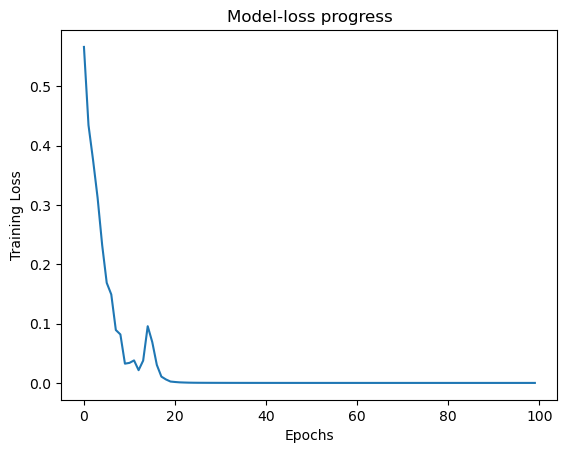

In [13]:
sns.lineplot(epoch_hists.history["loss"]).set(title="Model-loss progress", xlabel="Epochs", ylabel="Training Loss");

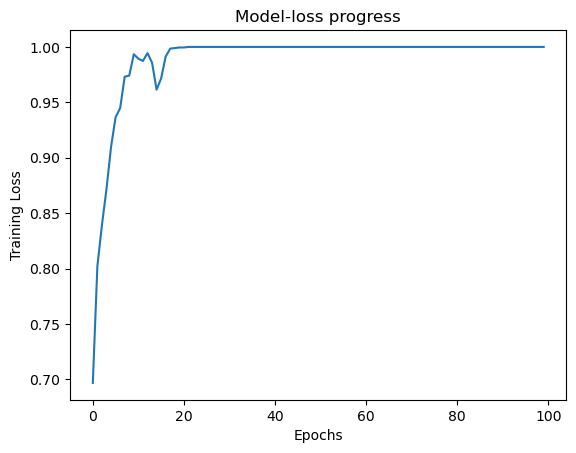

In [14]:
sns.lineplot(epoch_hists.history["accuracy"]).set(title="Model-loss progress", xlabel="Epochs", ylabel="Training Loss");

In [16]:
# Show the metrics of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

RESULTS_BASELINE = pd.DataFrame({
  "Metric": ["Accuracy", "Precision", "Recall", "F1"],
  "Value": [metric(y_true=y_test, y_pred=y_pred) for metric in [accuracy_score, precision_score, recall_score, f1_score]]
})

RESULTS_BASELINE

,Metric,Value
0,Accuracy,0.953441
1,Precision,0.933824
2,Recall,0.980695
3,F1,0.956685


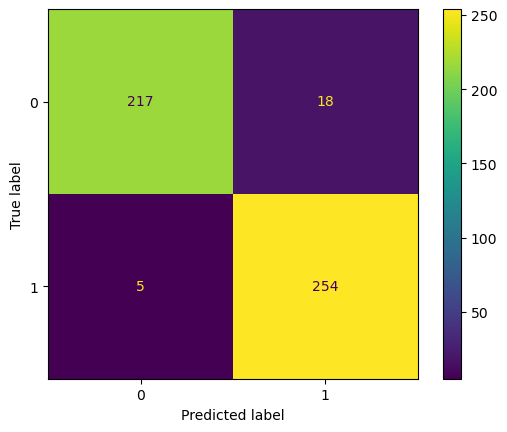

In [17]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
heatmap = ConfusionMatrixDisplay(confusion_matrix=cm)
heatmap.plot();

In [18]:
# Show the classification report
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       235
           1       0.93      0.98      0.96       259

    accuracy                           0.95       494
   macro avg       0.96      0.95      0.95       494
weighted avg       0.95      0.95      0.95       494

